# Time Series Analysis-Zamana Bağlı Veri Analizi

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [6]:
df=pd.read_csv('DailyDelhiClimateTrain.csv')

In [8]:
df.head()

,date,meantemp,humidity,wind_speed,meanpressure
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000


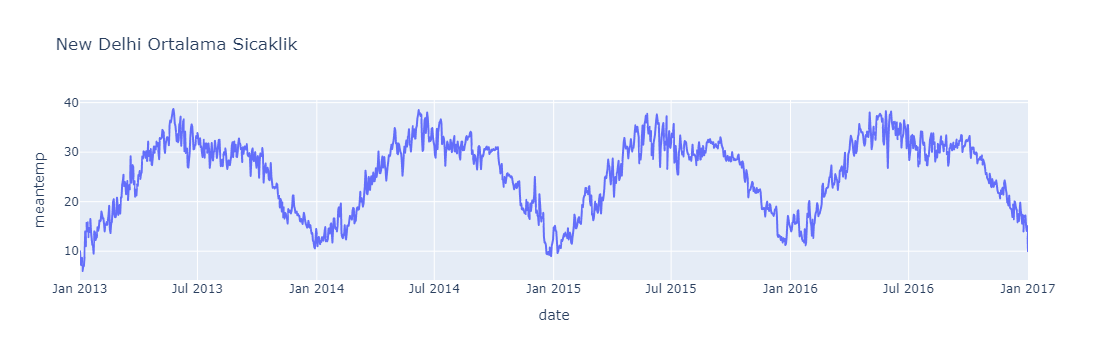

In [14]:
px.line(df,x='date',y='meantemp',title='New Delhi Ortalama Sicaklik')

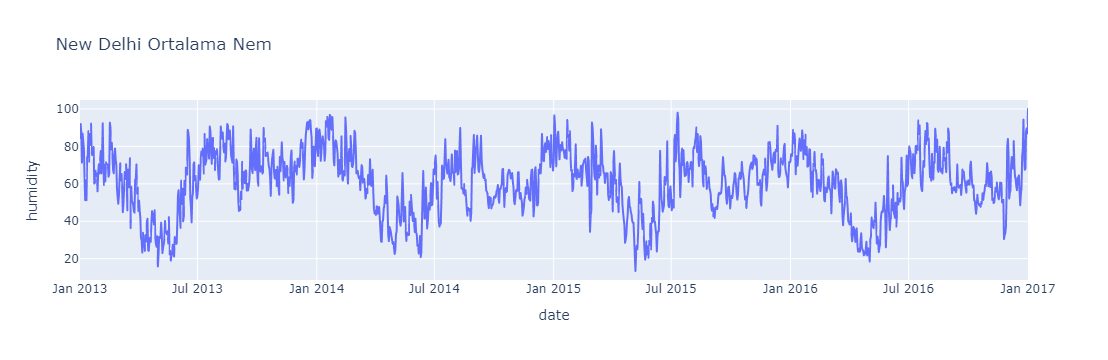

In [16]:
px.line(df,x='date',y='humidity',title='New Delhi Ortalama Nem')

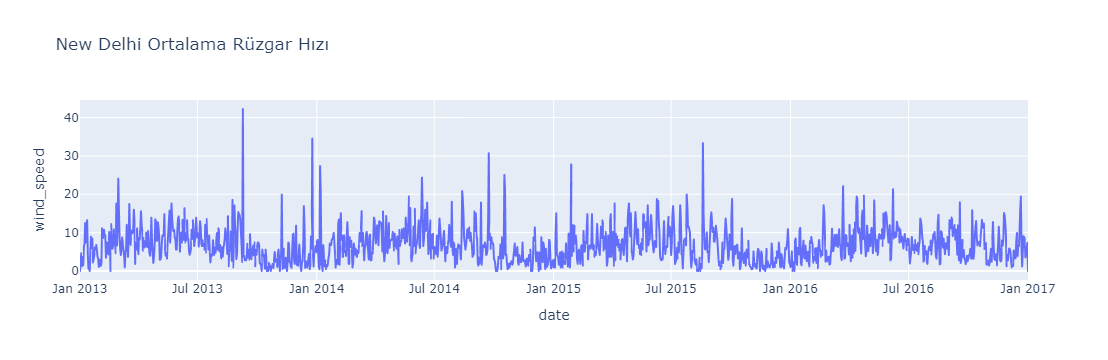

In [18]:
px.line(df,x='date',y='wind_speed',title='New Delhi Ortalama Rüzgar Hızı')

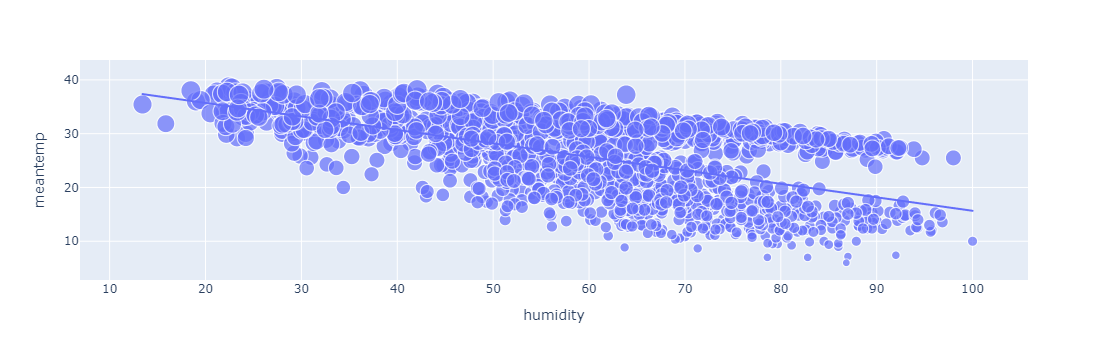

In [20]:
px.scatter(df,x='humidity',y='meantemp',size='meantemp',trendline='ols')

In [24]:
df['date']=pd.to_datetime(df['date'],format='%Y-%m-%d') #date i formatı bu olacak şekilde tarihe dönüştürüyoruz.

In [26]:
df['year']=df['date'].dt.year    #Year ve month adında sütun oluşturuyoruz.
df['month']=df['date'].dt.month

In [28]:
df.head()

,date,meantemp,humidity,wind_speed,meanpressure,year,month
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667,2013,1
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000,2013,1
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667,2013,1
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667,2013,1
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000,2013,1


<Axes: xlabel='month', ylabel='meantemp'>

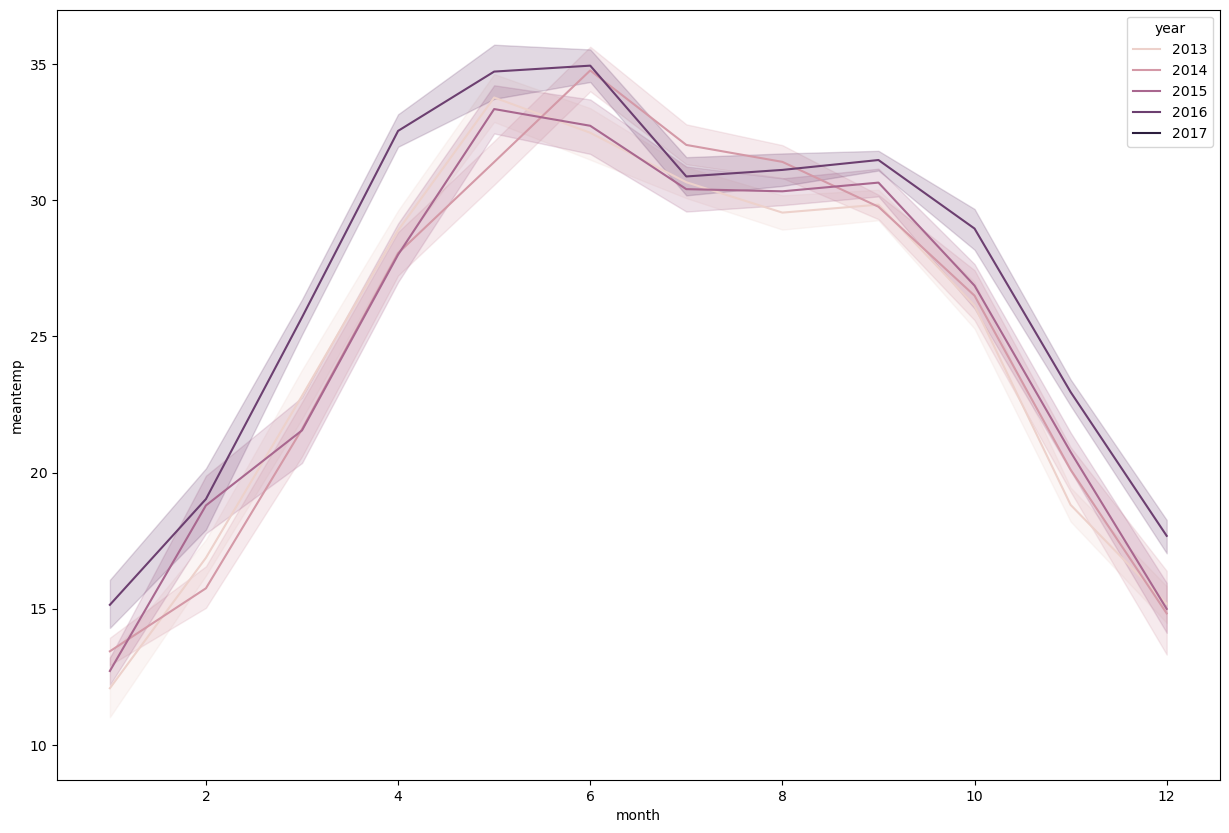

In [36]:
plt.figure(figsize=(15,10))
sns.lineplot(df,x='month',y='meantemp',hue='year') #hue yıla göre renklendirir.

In [38]:
df.head()

,date,meantemp,humidity,wind_speed,meanpressure,year,month
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667,2013,1
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000,2013,1
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667,2013,1
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667,2013,1
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000,2013,1


In [44]:
#pip install prophet sütunun adını y diye değiştirirsek prophet paketi hedef sütunu otomatik olarak anlar.

In [50]:
forecast_data=df.rename(columns={'date':'ds','meantemp':'y'})

23:03:46 - cmdstanpy - INFO - Chain [1] start processing
23:03:46 - cmdstanpy - INFO - Chain [1] done processing


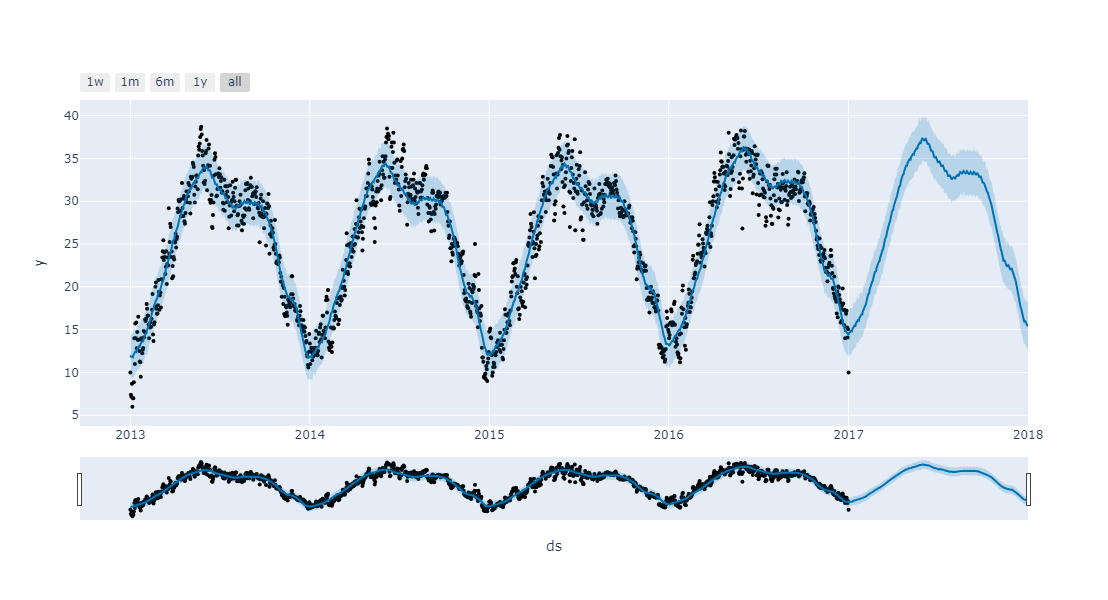

In [56]:
from prophet import Prophet
from prophet.plot import plot_plotly,plot_components_plotly
model=Prophet()
model.fit(forecast_data)
forecasts=model.make_future_dataframe(periods=365)
predictions=model.predict(forecasts)
plot_plotly(model,predictions)

In [58]:
#Üstteki grafikte 2017-2018 arası tahmindir